# Problem 1: Determining the type of a lightbulb


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mu_A = 2
mu_B = 2*mu_A + 0.01
prob_A = 2/3
prob_B = 1/3

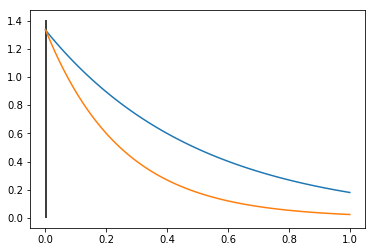

In [3]:
time = np.linspace(0, 1, 100)
post_A = prob_A * mu_A * np.exp(-mu_A * time)
post_B = prob_B * mu_B * np.exp(-mu_B * time)

plt.plot(time, post_A, label='bulb A')
plt.plot(time, post_B, label='bulb B')

# estimate cut off
alpha_num = np.log(mu_A * prob_A) - np.log(mu_B * prob_B)
alpha_den = mu_A - mu_B
alpha = alpha_num/alpha_den

y_min, y_max = plt.gca().get_ylim()
plt.vlines(alpha, 0, y_max)

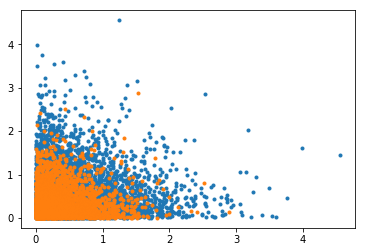

In [4]:
N = 10000
mu_A = 2
mu_B = 3
time_A = np.random.exponential(scale=1/mu_A, size=np.int(N*prob_A))
plt.plot(time_A[0:-1], time_A[1:], '.')

time_B = np.random.exponential(scale=1/mu_B, size=np.int(N*prob_B))
plt.plot(time_B[0:-1], time_B[1:], '.')


In [5]:
time = np.r_[time_A, time_B]
len(time)

9999

In [6]:
time_pick = (time > 1.95) & (time < 2.05)
idx = np.where(time_pick)[0]
np.mean(time[idx+1])

0.43696233586915528

In [7]:
K1 = 8*np.exp(-4)
K2 = 9*np.exp(-6)
K3 = 4 *np.exp(-4) + 3*np.exp(-6)

ans = K1/K3*1/4 + K2/K3*1/9
print(ans)

0.48464195375


# Problem 5: LLMS estimation with random sums

In [17]:
p = 1/2
n_simu = 20000
ab_list = []
N_list = []
na_list = []
a_list = []
for i in range(n_simu):
    N = np.random.geometric(p=p)
    a = np.random.normal(loc=1, scale=1, size=N)
    b = np.random.normal(loc=1, scale=1, size=N)
    a_list.append(np.sum(a))
    # E[ab]
    ab = np.sum(a) * np.sum(b)
    N_list.append(N)
    ab_list.append(ab)
    
    # E[na]
    na = N * np.sum(a)
    na_list.append(na)
    
# simulated sum
ab_simu = np.mean(ab_list)
# expected sum
ab_theory = (2-p)/p**2
print("E[AB]: simu={0:3.2f}; theory:{1:3.2f}".format(ab_simu, ab_theory))

# Analysis of na
na_simu = np.mean(na_list)
na_theory = (2-p)/p**2
print("E[NA]: simu={0:3.2f}; theory:{1:3.2f}".format(na_simu, na_theory))


E[AB]: simu=6.01; theory:6.00
E[NA]: simu=6.07; theory:6.00


Let N^=c1A+c2 be the LLMS estimator of N given A. Find c1 and c2 in terms of p.

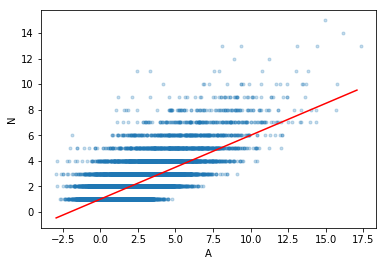

In [19]:
plt.plot(a_list, N_list, '.', alpha=0.25)
plt.xlabel('A')
plt.ylabel('N')

# best fit
A = np.arange(np.min(a_list), np.max(a_list))
y = 1 + (1-p)*A
plt.plot(A, y, 'r')